In [2]:
# Install required libraries
!pip install numpy pandas tensorflow scikit-learn matplotlib seaborn mlflow


  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/26.3 MB ? eta -:--:--
   ----------- ---------------------------- 7.6/26.3 MB 42.9 MB/s eta 0:00:01
   --------------------------- ------------ 17.8/26.3 MB 43.3 MB/s eta 0:00:01
   -------------------------------------- - 25.2/26.3 MB 40.9 MB/s eta 0:00:01
   ---------------------------------------- 26.3/26.3 MB 33.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   ---------------------------------------- 5.5/5.5 MB 41.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 38.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/538.8 kB ? eta -:--:--
   --------------------------------------- 538.8/538.8 kB 18.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# Check the shape of the datasets
print(train_data.shape)
print(test_data.shape)


(60000, 785)
(10000, 785)


In [6]:
import os
from PIL import Image
import numpy as np

def save_images_from_dataframe(df, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

    labels = df['label'].values
    images = df.drop(columns=['label']).values.reshape(-1, 28, 28)

    for i, img in enumerate(images):
        label = labels[i]
        
        # Convert to uint8 type which is expected by PIL
        img = img.astype(np.uint8)
        
        img = Image.fromarray(img, mode='L')  # Explicitly specify the mode as 'L' for grayscale
        img.save(os.path.join(directory, f"{label}_{i}.png"))

# Save train and test images
save_images_from_dataframe(train_data, 'fashion_mnist_train_images')
save_images_from_dataframe(test_data, 'fashion_mnist_test_images')


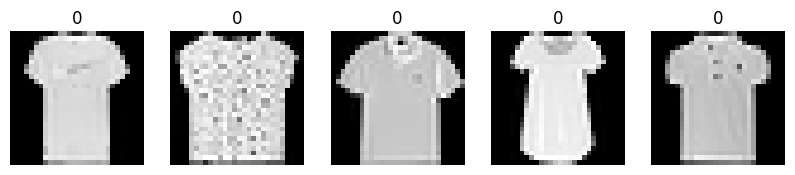

In [9]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def display_images(directory, num_images=10):
    image_files = os.listdir(directory)
    
    # Display the first num_images images
    plt.figure(figsize=(10, 10))
    for i, image_file in enumerate(image_files[:num_images]):
        img = Image.open(os.path.join(directory, image_file))
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(image_file.split('_')[0])  # Display the label in the title
    plt.show()

# Display images from the training set
display_images('fashion_mnist_train_images', num_images=5)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values

X_test = test_data.drop(columns=['label']).values
y_test = test_data['label'].values

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for model compatibility
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\syeda\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.6992 - loss: 0.8370 - val_accuracy: 0.8644 - val_loss: 0.3715
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8500 - loss: 0.4146 - val_accuracy: 0.8894 - val_loss: 0.3048
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8761 - loss: 0.3507 - val_accuracy: 0.8974 - val_loss: 0.2840
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8875 - loss: 0.3165 - val_accuracy: 0.9015 - val_loss: 0.2619
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8957 - loss: 0.2896 - val_accuracy: 0.9104 - val_loss: 0.2413
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9051 - loss: 0.2665 - val_accuracy: 0.9139 - val_loss: 0.2373
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9078 - loss: 0.2553 - val_accuracy: 0.9091 - val_loss: 0.2461
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9091 - loss: 0.2452 - 

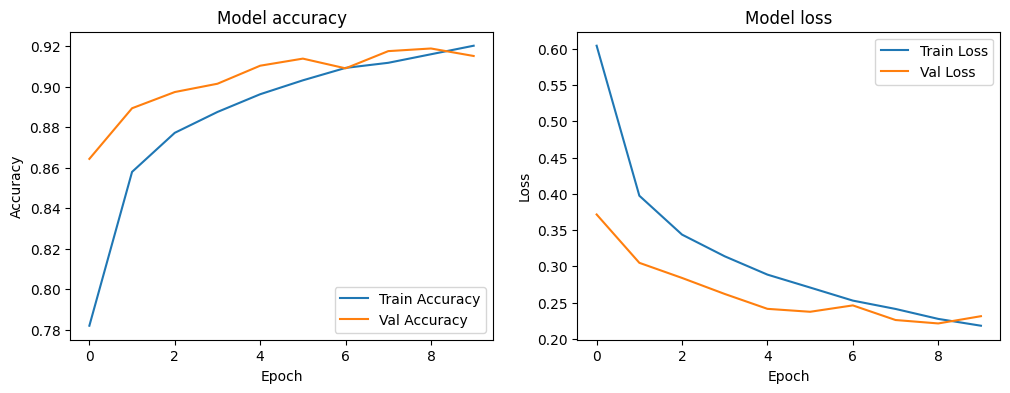

In [13]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [15]:
# For CNN
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# For Random Forest (Flatten the data)
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test), batch_size=64)

# Evaluate the CNN model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Test accuracy: {cnn_test_acc}")


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.6976 - loss: 0.8365 - val_accuracy: 0.8689 - val_loss: 0.3731
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8479 - loss: 0.4213 - val_accuracy: 0.8868 - val_loss: 0.3039
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8706 - loss: 0.3582 - val_accuracy: 0.8951 - val_loss: 0.2815
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8866 - loss: 0.3132 - val_accuracy: 0.9039 - val_loss: 0.2592
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8937 - loss: 0.2878 - val_accuracy: 0.9093 - val_loss: 0.2432
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9018 - loss: 0.2719 - val_accuracy: 0.9047 - val_loss: 0.2445
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9067 - loss: 0.2532 - val_accuracy: 0.9076 - val_loss: 0.2434
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9152 - loss: 0.2346 - 

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_rf, y_train)

# Predict using the Random Forest model
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate the Random Forest model
rf_test_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test accuracy: {rf_test_acc}")

# Detailed classification report
print(classification_report(y_test, y_pred_rf))


Random Forest Test accuracy: 0.8846
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.89      0.94      0.91      1000
           4       0.80      0.86      0.83      1000
           5       0.98      0.95      0.96      1000
           6       0.75      0.61      0.67      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



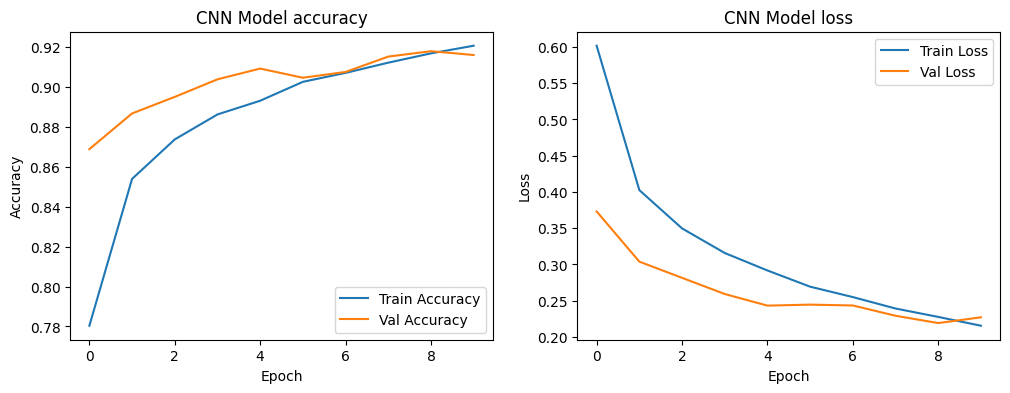

In [18]:
# CNN: Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label = 'Val Accuracy')
plt.title('CNN Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# CNN: Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label = 'Val Loss')
plt.title('CNN Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# Split features and labels
X_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values

X_test = test_data.drop(columns=['label']).values
y_test = test_data['label'].values

# Flatten and normalize the data for SVM
X_train_svm = X_train / 255.0
X_test_svm = X_test / 255.0

# Train the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_svm, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_svm)

# Calculate the accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Print the accuracy
print(f"SVM Model Accuracy: {svm_accuracy * 100:.2f}%")


SVM Model Accuracy: 85.70%
